In [ ]:
model_name = ["Deepseek-v2-lite", "Deepseek-moe-16b", "Qwen1.5-moe", "Qwen3-30B"]
model_name = ["DS-1", "DS-2", "QW-1", "QW-2"]
fslm = [1.37, 1.39, 1.31, 2.20]

sllm_pipe_time = [ 5.23, 3.95, 3.14, 7.30 ]
sllm_load_param_time = [ 2.05, 1.59, 1.36, 4.82 ]
sllm_first_prefill_time = [ 1.03 , 0.98 , 0.96, 1.55]

sllm_pipe_prefill = [ sllm_pipe_time[i] + sllm_first_prefill_time[i] for i in range(len(sllm_pipe_time))]
sllm_cache_prefill = [ sllm_load_param_time[i] + sllm_first_prefill_time[i] for i in range(len(sllm_load_param_time))]


fslm_1g = [1.94, 1.99, 1.89, 3.50]
fslm_2g = [1.56, 1.46, 1.50, 2.49]
fslm_3g = [1.44, 1.42, 1.38, 2.40]
fslm_4g = fslm

sllm_pipe_time_1g = [0, 0, 0, 0]
sllm_pipe_time_2g = [ 4.93, 3.88, 3.30, 0]
sllm_pipe_time_3g = [ 5.06, 3.79, 3.18, 7.58]
sllm_pipe_time_4g = [ 5.23, 3.95, 3.14, 7.30 ]

sllm_cache_time_1g = [ 0, 0, 0, 0]
sllm_cache_time_2g = [ 2.10, 1.76, 1.54, 0]
sllm_cache_time_3g = [ 2.14, 1.64, 1.30, 4.83]
sllm_cache_time_4g = [ 2.05, 1.59, 1.36, 4.82 ]

sllm_first_prefill_time_1g = [0, 0, 0, 0, 0]
sllm_first_prefill_time_2g = [0.88, 0.82, 0.83, 0]
sllm_first_prefill_time_3g = [0.98, 0.86, 0.88, 1.61] 
sllm_first_prefill_time_4g = [ 1.03 , 0.98 , 0.96, 1.55]

sllm_bmm_first_prefill_time_4g = [0.59,0.54,0.51,1.01]
# sllm_cpu_prefill_time_4g = []
sllm_bmm_prefill_time_4g = [ sllm_bmm_first_prefill_time_4g[i] + sllm_cache_time_4g[i] for i in range(len(sllm_bmm_first_prefill_time_4g))]

sllm_pipe_prefill_1g = [ sllm_pipe_time_1g[i] + sllm_first_prefill_time_1g[i] for i in range(len(sllm_pipe_time_1g))]
sllm_pipe_prefill_2g = [ sllm_pipe_time_2g[i] + sllm_first_prefill_time_2g[i] for i in range(len(sllm_pipe_time_2g))]
sllm_pipe_prefill_3g = [ sllm_pipe_time_3g[i] + sllm_first_prefill_time_3g[i] for i in range(len(sllm_pipe_time_3g))]
sllm_pipe_prefill_4g = sllm_pipe_prefill

sllm_cache_prefill_1g = [ sllm_cache_time_1g[i] + sllm_first_prefill_time_1g[i] for i in range(len(sllm_cache_time_1g))]
sllm_cache_prefill_2g = [ sllm_cache_time_2g[i] + sllm_first_prefill_time_2g[i] for i in range(len(sllm_cache_time_2g))]
sllm_cache_prefill_3g = [ sllm_cache_time_3g[i] + sllm_first_prefill_time_3g[i] for i in range(len(sllm_cache_time_3g))]
sllm_cache_prefill_4g = sllm_cache_prefill

sllm_decode_1g = [0, 0, 0, 0]
sllm_decode_2g = [0.25, 0.36, 0.32, 0]
sllm_decode_3g = [0.26, 0.37, 0.32, 0.54]
sllm_decode_4g = [0.27, 0.37, 0.34, 0.59]

fslm_decode_1g = [0.49, 0.43, 0.36, 0.85]
fslm_decode_2g = [0.20, 0.17, 0.15, 0.63]
fslm_decode_3g = [0.24, 0.25, 0.16, 0.41]
fslm_decode_4g = [0.22, 0.22, 0.18, 0.43]

print(sllm_pipe_prefill)
print(sllm_bmm_prefill_time_4g)

[6.260000000000001, 4.93, 4.1, 8.85]
[2.6399999999999997, 2.13, 1.87, 5.83]


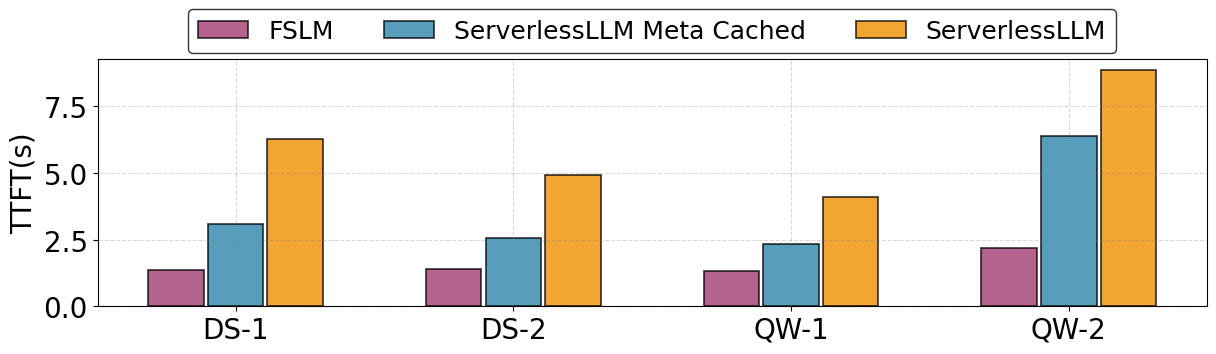

Chart saved: model_eval_bar_chart.pdf


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Set white style
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.linestyle'] = '--'

# Create bar chart
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
fontsize = 20

# Prepare data
x = np.arange(len(model_name))
n_metrics = 3
width = 0.2  # Width of each bar
gap = 0.015   # Gap between groups

# Data labels and values
metrics = [
    ('FSLM', fslm, '#A23B72'),
    ('ServerlessLLM Meta Cached', sllm_cache_prefill, '#2E86AB'),
    ('ServerlessLLM', sllm_pipe_prefill, '#F18F01'),
]

# Draw bar charts for all metrics
for idx, (label, values, color) in enumerate(metrics):
    offset = (idx - n_metrics / 2 + 0.5) * (width + gap)
    bars = ax.bar(x + offset, values, width, label=label, 
                  alpha=0.8, color=color, edgecolor='black', linewidth=1.2)

# Set labels and title
# ax.set_xlabel('Model', fontsize=fontsize, fontweight='bold', color='black')
ax.set_ylabel('TTFT(s)', fontsize=fontsize, color='black')
# ax.set_title('Model Performance Comparison (4 GPU 4090)', fontsize=fontsize+2, fontweight='bold', pad=15, color='black')
ax.set_xticks(x)
ax.set_xticklabels(model_name, color='black', fontsize=fontsize, rotation=0)
ax.tick_params(axis='both', which='major', labelsize=fontsize, colors='black')
ax.legend(fontsize=fontsize-2, loc='upper center', bbox_to_anchor=(0.5, 1.25), 
          frameon=True, facecolor='white', edgecolor='black', ncol=3)
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8, color='gray')
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('/mnt/zhengcf3/lmp/examples/draw/model_eval_bar_chart.pdf', 
            bbox_inches='tight', facecolor='white')
plt.show()

print("Chart saved: model_eval_bar_chart.pdf")

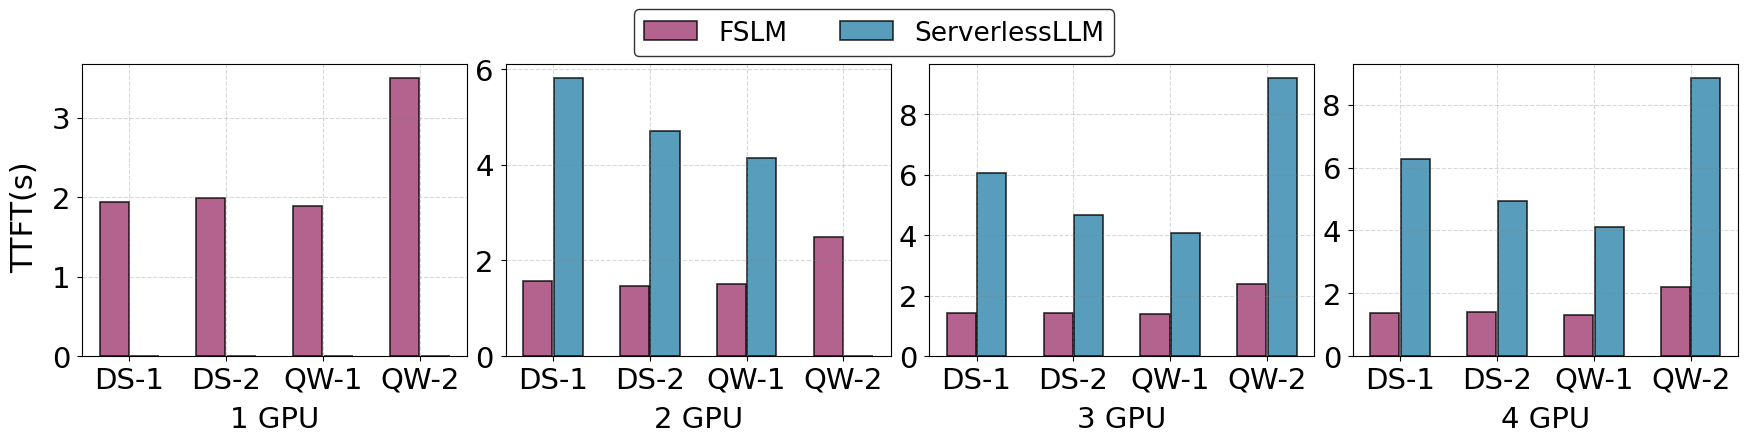

Chart saved: model_eval_multi_gpu_bar_chart.pdf


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# Set white style
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.linestyle'] = '--'

# Create 4 subplots in a row
fig, axes = plt.subplots(1, 4, figsize=(18,4))
fig.patch.set_facecolor('white')
fontsize = 22

# Prepare data for each GPU configuration
# gpu_configs = [
#     ('1 GPU', fslm_1g, sllm_cache_prefill_1g, sllm_pipe_prefill_1g),
#     ('2 GPU', fslm_2g, sllm_cache_prefill_2g, sllm_pipe_prefill_2g),
#     ('3 GPU', fslm_3g, sllm_cache_prefill_3g, sllm_pipe_prefill_3g),
#     ('4 GPU', fslm_4g, sllm_cache_prefill_4g, sllm_pipe_prefill_4g),
# ]

gpu_configs = [
    ('1 GPU', fslm_1g, sllm_pipe_prefill_1g),
    ('2 GPU', fslm_2g, sllm_pipe_prefill_2g),
    ('3 GPU', fslm_3g, sllm_pipe_prefill_3g),
    ('4 GPU', fslm_4g, sllm_pipe_prefill_4g),
]

# Data labels and colors
metrics = [
    ('FSLM', '#A23B72'),
    # ('ServerlessLLM Meta Cached', '#F18F01'),
    ('ServerlessLLM', '#2E86AB'),
]

# Draw bar charts for each GPU configuration
# for gpu_idx, (gpu_name, fslm_data, cache_data, pipe_data) in enumerate(gpu_configs):
for gpu_idx, (gpu_name, fslm_data, pipe_data) in enumerate(gpu_configs):
    ax = axes[gpu_idx]
    ax.set_facecolor('white')
    
    x = np.arange(len(model_name))
    n_metrics = 2
    width = 0.3
    gap = 0.015
    
    # Draw bars for each metric
    # data_list = [fslm_data, cache_data, pipe_data]
    data_list = [fslm_data, pipe_data]
    for idx, ((label, color), values) in enumerate(zip(metrics, data_list)):
        offset = (idx - n_metrics / 2 + 0.5) * (width + gap)
        bars = ax.bar(x + offset, values, width, label=label, 
                      alpha=0.8, color=color, edgecolor='black', linewidth=1.2)
    
    # Set labels and title for each subplot
    ax.set_xlabel(gpu_name, fontsize=fontsize-1, color='black', labelpad=8)
    ax.set_xticks(x)
    ax.set_xticklabels(model_name, color='black', fontsize=fontsize-1, rotation=0)
    ax.tick_params(axis='both', which='major', labelsize=fontsize-1, colors='black')
    # Set Y-axis to use integer ticks only
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    # Adjust Y-axis label padding to avoid overlap
    ax.tick_params(axis='y', pad=5)
    ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8, color='gray')
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')

# Set legend only once (outside the plots) - get handles and labels from second subplot (which has all metrics)
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), 
          frameon=True, facecolor='white', edgecolor='black', ncol=3, fontsize=fontsize-3)

# Set common y label with more padding
fig.text(0.02, 0.5, 'TTFT(s)', va='center', rotation='vertical', fontsize=fontsize, color='black')

# Adjust subplot spacing to prevent overlap
plt.subplots_adjust(left=0.06, right=0.98, top=0.88, bottom=0.15, wspace=0.1)
plt.savefig('/mnt/zhengcf3/lmp/examples/draw/model_eval_multi_gpu_bar_chart.pdf', 
            bbox_inches='tight', facecolor='white')
plt.show()

print("Chart saved: model_eval_multi_gpu_bar_chart.pdf")

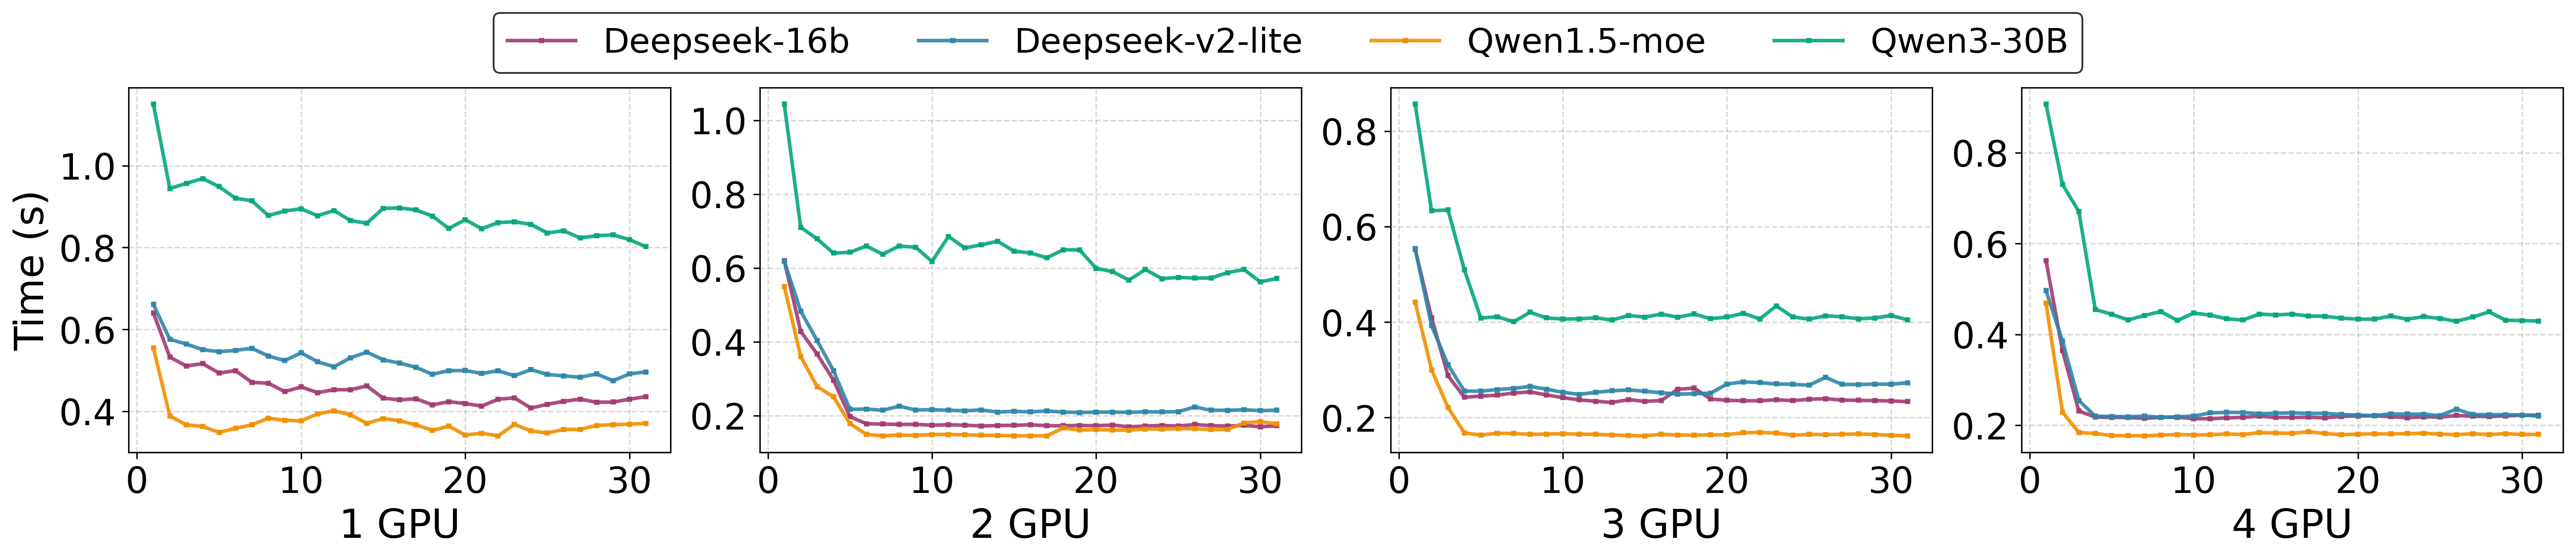

Chart saved: decode_time_all_gpu.pdf


In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt

# 读取 timing_data.json
with open('/mnt/zhengcf3/lmp/examples/draw/timing_data.json', 'r') as f:
    timing_data = json.load(f)

# 设置绘图样式
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['figure.dpi'] = 300

# 模型名称映射
model_names = {
    'deepseek-16b': 'Deepseek-16b',
    'deepseek-v2-lite': 'Deepseek-v2-lite',
    'qwen1.5-moe': 'Qwen1.5-moe',
    'qwen3-30B': 'Qwen3-30B'
}

# 颜色映射
colors = {
    'deepseek-16b': '#A23B72',
    'deepseek-v2-lite': '#2E86AB',
    'qwen1.5-moe': '#F18F01',
    'qwen3-30B': '#06A77D'
}

# 创建图形 - 横向排列4个子图（1行4列）
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
fig.patch.set_facecolor('white')
fontsize = 22

# GPU配置列表
gpu_configs = ['1g', '2g', '3g', '4g']
gpu_labels = ['1 GPU', '2 GPU', '3 GPU', '4 GPU']

# 为每个GPU配置创建子图
for gpu_idx, (gpu_config, gpu_label) in enumerate(zip(gpu_configs, gpu_labels)):
    ax = axes[gpu_idx]
    ax.set_facecolor('white')
    
    # 提取每个模型在当前GPU配置下的数据并取平均
    for model_key, model_display_name in model_names.items():
        if model_key in timing_data:
            # 提取对应GPU配置的_1, _2, _3数据
            data_1 = np.array(timing_data[model_key].get(f'{gpu_config}_1', []))
            data_2 = np.array(timing_data[model_key].get(f'{gpu_config}_2', []))
            data_3 = np.array(timing_data[model_key].get(f'{gpu_config}_3', []))
            
            # 确保三个数组长度一致（取最小长度）
            if len(data_1) > 0 and len(data_2) > 0 and len(data_3) > 0:
                min_len = min(len(data_1), len(data_2), len(data_3))
                min_len = min_len - 1
                data_1 = data_1[:min_len]
                data_2 = data_2[:min_len]
                data_3 = data_3[:min_len]
                
                # 计算平均值
                data_avg = (data_1 + data_2 + data_3) / 3.0
                
                # 绘制 decode 变化曲线（跳过第一个 token，因为通常是 prefill）
                decode_tokens = np.arange(1, len(data_avg))
                decode_times = data_avg[1:]
                
                ax.plot(decode_tokens, decode_times, 
                       label=model_display_name, 
                       color=colors.get(model_key, '#000000'),
                       linewidth=2, 
                       marker='s', 
                       markersize=2,
                       alpha=0.9)
    
    # 设置每个子图的标签和标题
    # ax.set_xlabel('Decode Step', fontsize=fontsize-1, color='black')
    if gpu_idx == 0:
        ax.set_ylabel('Time (s)', fontsize=fontsize, color='black')
    # ax.set_title(gpu_label, fontsize=fontsize+1, color='black')
    ax.set_xlabel(gpu_label, fontsize=fontsize, color='black')
    ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8, color='gray')
    ax.tick_params(axis='both', which='major', labelsize=fontsize-2, colors='black')
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')

# 设置图例（只在第一个子图显示，或者统一在底部）
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), 
          frameon=True, facecolor='white', edgecolor='black', ncol=4, fontsize=fontsize-3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('/mnt/zhengcf3/lmp/examples/draw/decode_time_all_gpu.pdf', 
            bbox_inches='tight', facecolor='white')
plt.show()

print("Chart saved: decode_time_all_gpu.pdf")

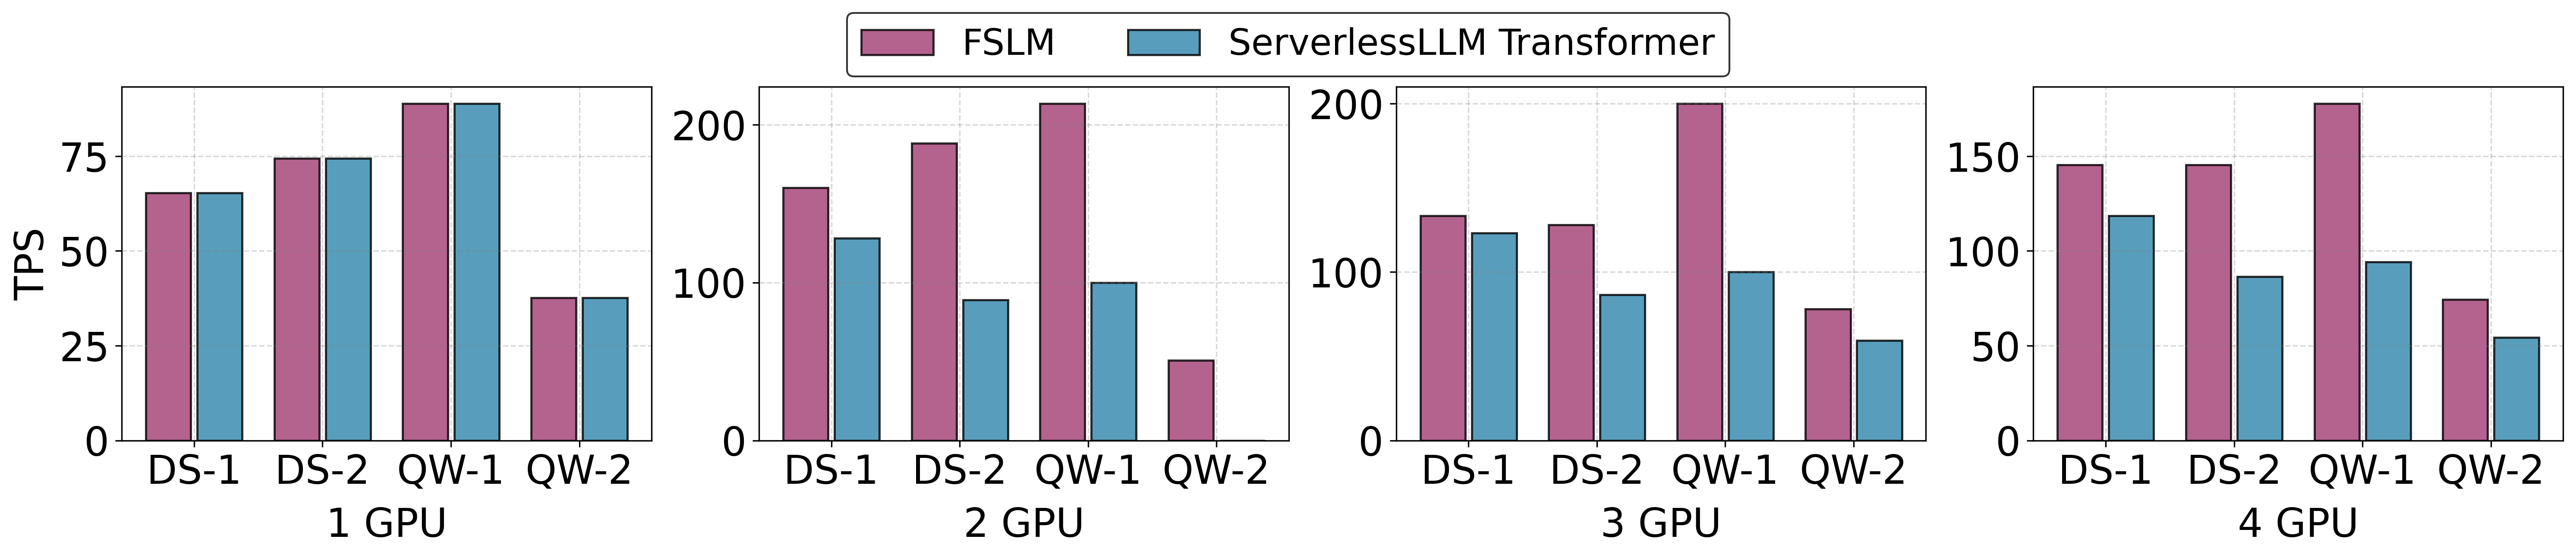

Chart saved: decode_tps_comparison.pdf

FSLM TPS (1g, 2g, 3g, 4g):
  1g: [2.0408163265306123, 2.3255813953488373, 2.7777777777777777, 1.1764705882352942]
  2g: [5.0, 5.88235294117647, 6.666666666666667, 1.5873015873015872]
  3g: [4.166666666666667, 4.0, 6.25, 2.4390243902439024]
  4g: [4.545454545454546, 4.545454545454546, 5.555555555555555, 2.3255813953488373]

ServerlessLLM TPS (1g, 2g, 3g, 4g):
  1g: [2.0408163265306123, 2.3255813953488373, 2.7777777777777777, 1.1764705882352942]
  2g: [4.0, 2.7777777777777777, 3.125, 0]
  3g: [3.846153846153846, 2.7027027027027026, 3.125, 1.8518518518518516]
  4g: [3.7037037037037033, 2.7027027027027026, 2.941176470588235, 1.6949152542372883]


In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt

# 读取 timing_data.json
with open('/mnt/zhengcf3/lmp/examples/draw/timing_data.json', 'r') as f:
    timing_data = json.load(f)

# 模型名称映射（与 timing_data.json 中的键对应）
model_keys = ['deepseek-v2-lite', 'deepseek-16b', 'qwen1.5-moe', 'qwen3-30B']

# 计算 FSLM 的平均 decode 时间（从 timing_data.json 提取）
fslm_decode_avg_1g = []
fslm_decode_avg_2g = []
fslm_decode_avg_3g = []
fslm_decode_avg_4g = []

for model_key in model_keys:
    if model_key in timing_data:
        # 提取每个GPU配置的数据
        for gpu_config, result_list in [('1g', fslm_decode_avg_1g), 
                                         ('2g', fslm_decode_avg_2g),
                                         ('3g', fslm_decode_avg_3g),
                                         ('4g', fslm_decode_avg_4g)]:
            # 提取对应配置的_1, _2, _3数据
            data_1 = np.array(timing_data[model_key].get(f'{gpu_config}_1', []))
            data_2 = np.array(timing_data[model_key].get(f'{gpu_config}_2', []))
            data_3 = np.array(timing_data[model_key].get(f'{gpu_config}_3', []))
            
            # 确保三个数组长度一致（取最小长度）
            if len(data_1) > 0 and len(data_2) > 0 and len(data_3) > 0:
                min_len = min(len(data_1), len(data_2), len(data_3))
                data_1 = data_1[:min_len]
                data_2 = data_2[:min_len]
                data_3 = data_3[:min_len]
                
                # 计算平均值
                data_avg = (data_1 + data_2 + data_3) / 3.0
                
                # 跳过第一个token（prefill），计算decode token的平均时间
                if len(data_avg) > 1:
                    decode_times = data_avg[1:]  # 跳过第一个
                    avg_decode_time = np.mean(decode_times)  # 计算平均decode时间
                    result_list.append(avg_decode_time)
                else:
                    result_list.append(0)
            else:
                result_list.append(0)
# 计算 FSLM 的平均 decode 时间（从 timing_data.json 提取）
fslm_decode_avg_1g = fslm_decode_1g
fslm_decode_avg_2g = fslm_decode_2g
fslm_decode_avg_3g = fslm_decode_3g
fslm_decode_avg_4g = fslm_decode_4g

# print(fslm_decode_avg_2g)
# 计算 TPS (Tokens Per Second) = 1 / decode_time
fslm_tps_1g = [1.0 / t if t > 0 else 0 for t in fslm_decode_avg_1g]
fslm_tps_2g = [1.0 / t if t > 0 else 0 for t in fslm_decode_avg_2g]
fslm_tps_3g = [1.0 / t if t > 0 else 0 for t in fslm_decode_avg_3g]
fslm_tps_4g = [1.0 / t if t > 0 else 0 for t in fslm_decode_avg_4g]

# ServerlessLLM 的 TPS（从已有的 decode 时间计算）
sllm_tps_1g = [1.0 / t if t > 0 else 0 for t in sllm_decode_1g]
sllm_tps_2g = [1.0 / t if t > 0 else 0 for t in sllm_decode_2g]
sllm_tps_3g = [1.0 / t if t > 0 else 0 for t in sllm_decode_3g]
sllm_tps_4g = [1.0 / t if t > 0 else 0 for t in sllm_decode_4g]

# 设置绘图样式
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['figure.dpi'] = 300

# 创建4个子图横向排列
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
fig.patch.set_facecolor('white')
fontsize = 22

batch = 32
# GPU配置列表
gpu_configs = [
    ('1 GPU', fslm_tps_1g, sllm_tps_1g),
    ('2 GPU', fslm_tps_2g, sllm_tps_2g),
    ('3 GPU', fslm_tps_3g, sllm_tps_3g),
    ('4 GPU', fslm_tps_4g, sllm_tps_4g),
]

# 为每个GPU配置创建子图
for gpu_idx, (gpu_name, fslm_tps, sllm_tps) in enumerate(gpu_configs):
    ax = axes[gpu_idx]
    ax.set_facecolor('white')
    
    x = np.arange(len(model_name))
    width = 0.35  # 柱状图宽度
    gap = 0.05    # 柱状图之间的间隔
    
    fslm_tps = [t*batch for t in fslm_tps]
    sllm_tps = [t*batch for t in sllm_tps]
    # 绘制柱状图
    bars1 = ax.bar(x - width/2 - gap/2, fslm_tps, width, 
                   label='FSLM', color='#A23B72', 
                   alpha=0.8, edgecolor='black', linewidth=1.2)
    bars2 = ax.bar(x + width/2 + gap/2, sllm_tps, width, 
                   label='ServerlessLLM Transformer', color='#2E86AB', 
                   alpha=0.8, edgecolor='black', linewidth=1.2)
    
    # 设置标签和标题
    ax.set_xlabel(gpu_name, fontsize=fontsize, color='black', labelpad=8)
    if gpu_idx == 0:
        ax.set_ylabel('TPS', fontsize=fontsize, color='black')
    ax.set_xticks(x)
    ax.set_xticklabels(model_name, color='black', fontsize=fontsize, rotation=0)
    ax.tick_params(axis='both', which='major', labelsize=fontsize, colors='black')
    ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8, color='gray')
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')

# 设置图例（统一在顶部）
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), 
          frameon=True, facecolor='white', edgecolor='black', ncol=2, fontsize=fontsize-2)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('/mnt/zhengcf3/lmp/examples/draw/decode_tps_comparison.pdf', 
            bbox_inches='tight', facecolor='white')
plt.show()

print("Chart saved: decode_tps_comparison.pdf")
print("\nFSLM TPS (1g, 2g, 3g, 4g):")
print(f"  1g: {fslm_tps_1g}")
print(f"  2g: {fslm_tps_2g}")
print(f"  3g: {fslm_tps_3g}")
print(f"  4g: {fslm_tps_4g}")
print("\nServerlessLLM TPS (1g, 2g, 3g, 4g):")
print(f"  1g: {sllm_tps_1g}")
print(f"  2g: {sllm_tps_2g}")
print(f"  3g: {sllm_tps_3g}")
print(f"  4g: {sllm_tps_4g}")

